In [76]:
#we will use a multiplicative congruential algorithm with a questinable chioce of paramenters as an example
#of bad RNG, and the inbuilt RNG in python.

#Multiplicative linear congruential generator:
%matplotlib inline
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import scipy.optimize as so
import scipy.integrate as integrate
import random as rn
import statistics as st

a=16807
m=2**20-1
xo=343  
c=0
bins=10
num=[]
nseeds=1
nsam=10000
for n in range(0,nseeds*nsam):
    xj=((a*xo+c)%m)
    xo=xj
    num.append(xj/m)
counts_b= np.histogram(num,bins)        

In [77]:
import random as rn
nump=[]
so=123
for n in range(0,nseeds):
    rn.seed(so+n)
    for i in range(0,nsam):
        nump.append(rn.SystemRandom().random())
counts_g= np.histogram(nump,bins)

In [23]:
#chi-square test of uniformity
#the closer to 1 the better
#number of bins computed using sturge's rule
bins=int(1+3.22*mt.log(nsam*nseeds))

counts_b= np.histogram(num,bins) 
counts_g= np.histogram(nump,bins)


print(bins)

def chitest(data,ndata,bins):
    exp=ndata/(bins)
    chi=0
    for i in range(0,bins):
        chi=chi+(data[i]-exp)**2/(exp)
    return(chi)
print(chitest(counts_b[0],nsam*nseeds,bins))
print(chitest(counts_g[0],nsam*nseeds,bins))

sp.chi2.ppf(1-.05, bins-1)

45
1500002.5002200005
50.762779999999985


60.480886582336446

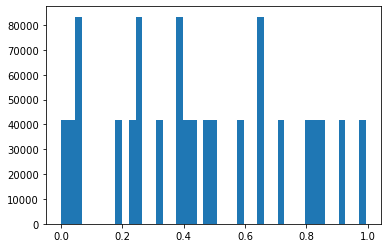

In [24]:
_= plt.hist(num,bins)


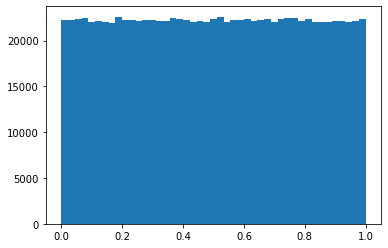

In [25]:
_= plt.hist(nump,bins)

In [169]:
print(st.median(num))

0.5015569226830796


In [71]:
#runs test
#if we fix significance to e.g. 0.05 we say sample is not random if pval<0.05
def runs(data):
    median=st.median(data)
    print(median)
    binlist=[]
    pi=0
    v=1
    n=len(data)
    for i in range(0,len(data)):
        if(data[i]>= median):
            binlist.append(1)
            pi=pi+1/len(data)
        else:
            binlist.append(0)        
    for i in range(0,len(binlist)-1):
        if(binlist[i+1]!=binlist[i]):
            v=v+1
        else:
            v=v+0
    pval=mt.erfc((v-2*n*pi*(1-pi))/(2*mt.sqrt(2*n)*pi*(1-pi)))
    return(binlist,pi,pval)

print(runs(num)[2])
print(runs(nump)[2])


0.4332317669217748
2.0
0.49893248460238343
0.3270861186553847


In [272]:
def runs2(data):
    pi=0
    v=1
    n=len(data)
    for i in range(0,len(data)):
        if(data[i]== 1):
            pi=pi+1/len(data)
        else:
            pi=pi+0
    print(pi)        
    for i in range(0,len(data)-1):
        if(data[i+1]!=data[i]):
            v=v+1
        else:
            v=v+0
    print(v)
    pval=mt.erfc((v-2*n*pi*(1-pi))/(2*mt.sqrt(2*n)*pi*(1-pi)))
    return(data,pi,pval)


l=[1,0,0,1,1,0,1,0,1,1]
print(runs2(l)[2])



0.6
7
0.1472322553636657


In [27]:
#KOLMOGOROV-SMIRNOV

def ks(data):
    n=len(data)
    sort=[]
    for i in range(0,n):
        sort.append(data[i])
    sort.sort()
    
    kpl=[]
    kml=[]
    for i in range(0,n):
        kpl.append(i/n-sort[i])
        kml.append(sort[i]-(i-1)/n)
    kplus=max(kpl)
    kmin=max(kml)
    k=max(mt.sqrt(n)*kplus,mt.sqrt(n)*kmin)
    return(k)
print(ks(num))
print(ks(nump))


127.25110404596712
0.8934906820513566


In [72]:
#reverse arrangements
def reverse(data):
    alist=[]
    n=len(data)
    nloops=int(n/100)
    for q in range(0,nloops):
        dat=[]
        for i in range(0,100):
            dat.append(data[100*q+i])
        ai=[]
        a=0
        for i in range(0,99):
            ai.append(0)
            for j in range(i+1,100):
                if (dat[i]>dat[j]):
                    ai[i]=ai[i]+1
            a=a+ai[i]
        alist.append(a)
        
    return(sum(alist)/len(alist),mt.sqrt(np.var(alist)))
        

test=[]
for i in range(0,1000):
    test.append(rn.random())

print(reverse(num)) 
print(reverse(nump))

(2429.22, 62.13961377414572)
(2501.05, 167.04780004537622)


In [259]:
m=2**31-1
a=7**5%m
x=7**3%m
print(a,x)

16807 343


In [29]:
#we will use a multiplicative congruential algorithm with a questinable chioce of paramenters as an example
#of bad RNG, and the inbuilt RNG in python.

#Multiplicative linear congruential generator:
%matplotlib inline
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import scipy.optimize as so
import scipy.integrate as integrate
import random as rn
import statistics as st

a=65539
m=2**31-1
xo=322365
c=0
bins=10
num=[]
nseeds=1024
nsam=1024
for n in range(0,nseeds):
    xi=xo+n
    for i in range(0,nsam):
        xj=((a*xi+c)%m)
        xi=xj
        num.append(xj/m)
counts_b= np.histogram(num,bins) 

In [51]:
#DEFINITIVE RUNS TEST

def run3(data):
    median=st.median(data)
    binlist=[]
    n1,n0,v=0,0,1
    mu,sig=0,0
    for i in range(0,len(data)):
        if(data[i]> median):
            binlist.append(1)
            n1+=1
        if(data[i]< median):
            binlist.append(0)
            n0+=1
    for i in range(0,len(binlist)-1):
        if(binlist[i+1]!=binlist[i]):
            v=v+1
        else:
            v=v+0
    
    mu=2*n1*n0/(n1+n0)+1
    sig=mt.sqrt(2*n1*n0*(2*n1*n0-n1-n0)/((n1+n0)**2*(n1+n0-1)))
    if (v>=mu):
        k=-0.5
    if (v<mu):
        k=0.5
    z=(v+k-mu)/sig
        
    return(z)

print(run3(num))
print(run3(nump))

-sp.norm.ppf(.05)



    

1.741211767775461
0.6770003385005924


1.6448536269514729

In [78]:
#reverse arrangements
def reverse2(data):
    alist=[]
    n=len(data)
    a=0
    for i in range(0,n-1):
        if(i%100==0):
            print(i)
        for j in range(i+1,n):
            if(data[i]>data[j]):
                a+=1
    mu=n*(n-1)/4
    sig=mt.sqrt(n*(2*n-1)*(n-1)/72)
    z=(a-mu)/sig
    return(z)

print(reverse2(nump))
print(reverse2(num))
        
-sp.norm.ppf(.05)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
-1.7595959702476838
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
-6.1

1.6448536269514729